In [3]:
!git clone https://github.com/rnogara/image-dimension

Cloning into 'image-dimension'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 87.32 KiB | 2.91 MiB/s, done.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Processando imagem...
Imagem carregada: (800, 1200, 3)
Tipo de dados: uint8
Imagem em cinza: (800, 1200)
Threshold automático (Otsu): 102

=== Estatísticas ===
Original - Min: 0, Max: 255
Cinza - Min: 4, Max: 251
Binária (auto) - Valores únicos: [  0 255]
Binária (fixo) - Valores únicos: [  0 255]


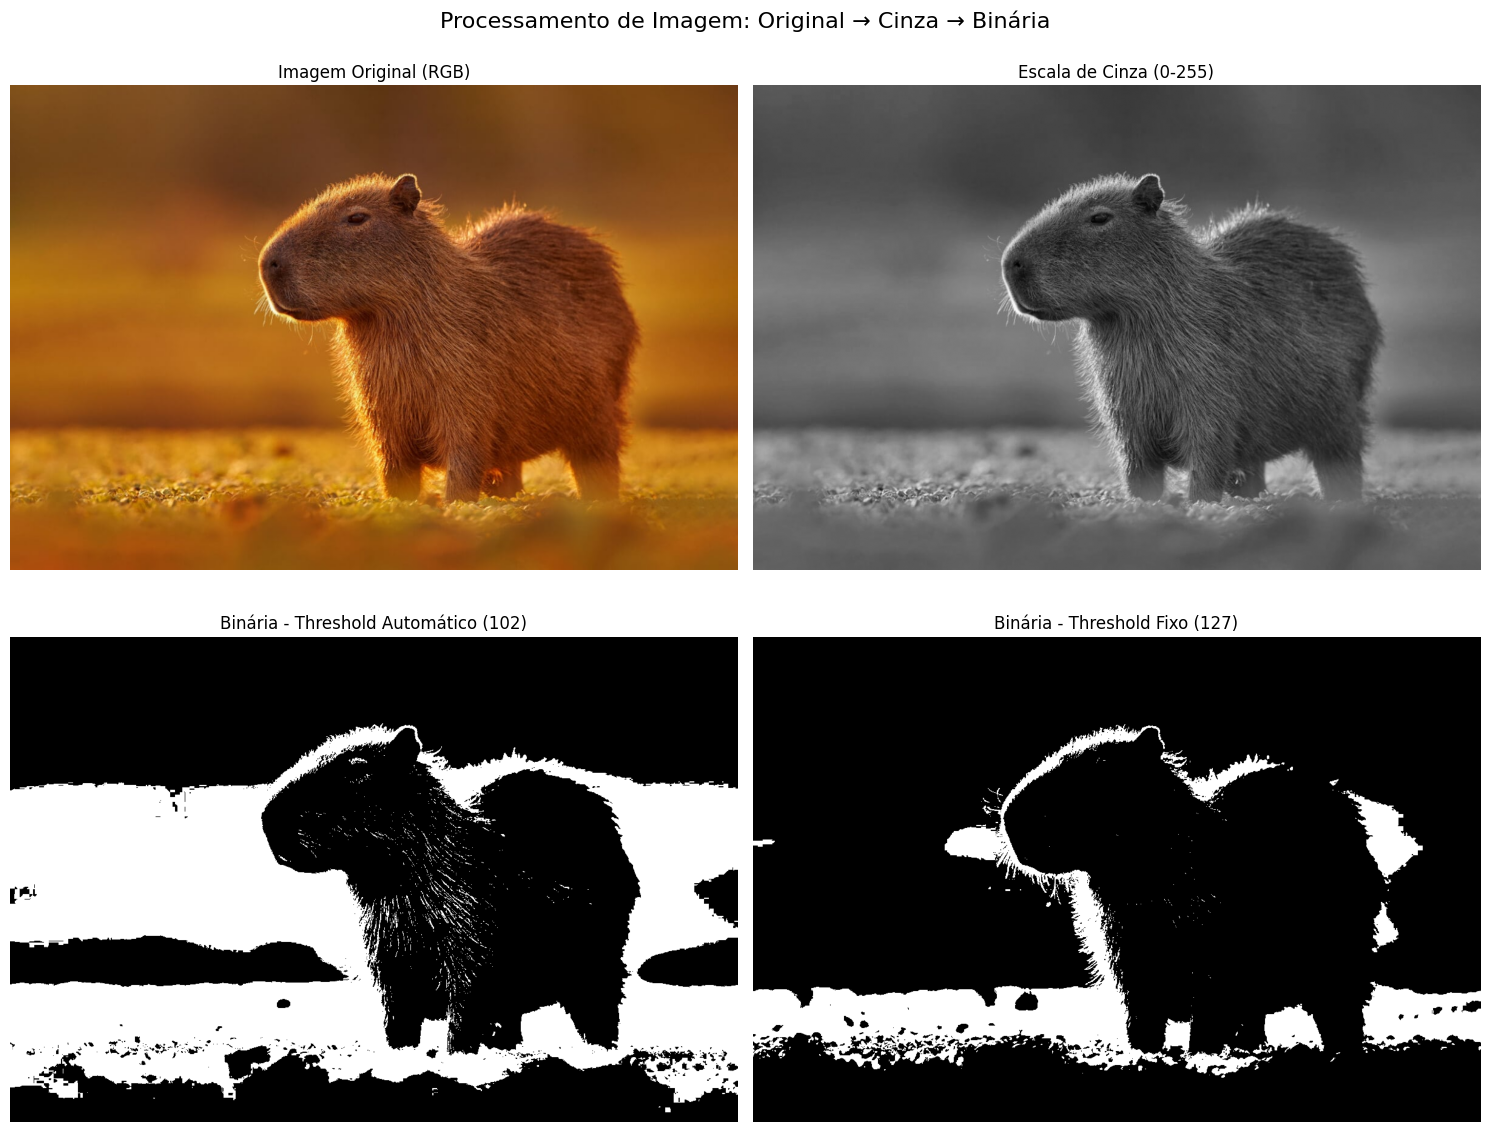

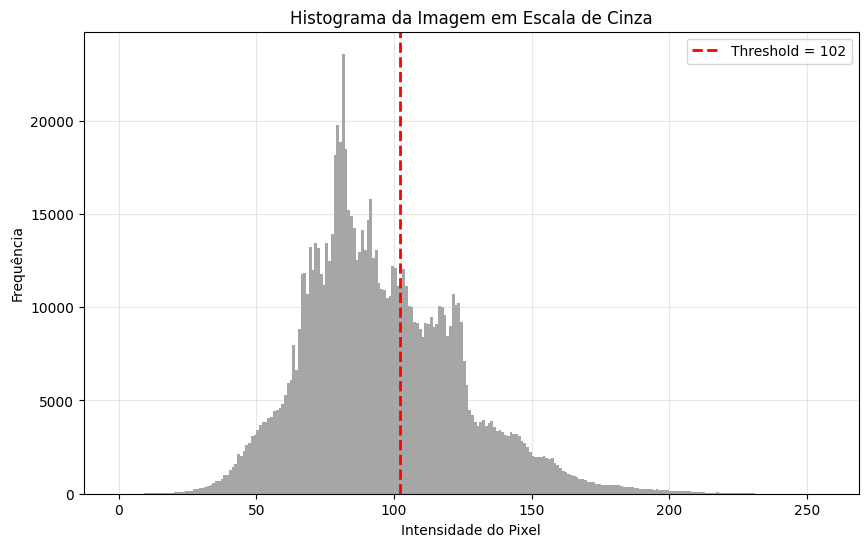

Processamento concluído!


In [10]:
def rgb_to_grayscale(image_array):
    """
    Converte uma imagem RGB para níveis de cinza usando a fórmula de luminância.
    Fórmula: Y = 0.299*R + 0.587*G + 0.114*B
    """
    # Verifica se a imagem tem 3 canais (RGB)
    if len(image_array.shape) == 3:
        # Aplica os pesos para cada canal de cor
        grayscale = (image_array[:, :, 0] * 0.299 +
                    image_array[:, :, 1] * 0.587 +
                    image_array[:, :, 2] * 0.114)
    else:
        # Se já estiver em escala de cinza, retorna como está
        grayscale = image_array

    # Garante que os valores estejam entre 0 e 255
    grayscale = np.clip(grayscale, 0, 255).astype(np.uint8)

    return grayscale

def grayscale_to_binary(grayscale_array, threshold=127):
    """
    Converte uma imagem em escala de cinza para binária (preto e branco).
    Pixels acima do threshold ficam brancos (255), abaixo ficam pretos (0).
    """
    binary = np.where(grayscale_array > threshold, 255, 0).astype(np.uint8)
    return binary

def otsu_threshold(grayscale_array):
    """
    Calcula o threshold ótimo usando o método de Otsu.
    Este método encontra automaticamente o melhor valor de threshold.
    """
    # Calcula o histograma
    hist, _ = np.histogram(grayscale_array.flatten(), bins=256, range=(0, 256))

    # Normaliza o histograma
    hist = hist.astype(float)
    hist /= hist.sum()

    # Calcula a variância entre classes para cada threshold possível
    max_variance = 0
    best_threshold = 0

    for t in range(256):
        # Probabilidades das duas classes
        w0 = np.sum(hist[:t])
        w1 = np.sum(hist[t:])

        if w0 == 0 or w1 == 0:
            continue

        # Médias das duas classes
        mu0 = np.sum(np.arange(t) * hist[:t]) / w0
        mu1 = np.sum(np.arange(t, 256) * hist[t:]) / w1

        # Variância entre classes
        variance = w0 * w1 * (mu0 - mu1) ** 2

        if variance > max_variance:
            max_variance = variance
            best_threshold = t

    return best_threshold

def process_image(image_path):
    """
    Processa a imagem: carrega, converte para cinza e binariza.
    """
    try:
        # Carrega a imagem
        image = Image.open(image_path)

        # Converte para array numpy
        image_array = np.array(image)

        print(f"Imagem carregada: {image_array.shape}")
        print(f"Tipo de dados: {image_array.dtype}")

        # Converte para escala de cinza
        grayscale = rgb_to_grayscale(image_array)
        print(f"Imagem em cinza: {grayscale.shape}")

        # Calcula threshold automático usando Otsu
        auto_threshold = otsu_threshold(grayscale)
        print(f"Threshold automático (Otsu): {auto_threshold}")

        # Converte para binária usando threshold automático
        binary_auto = grayscale_to_binary(grayscale, auto_threshold)

        # Converte para binária usando threshold fixo (127)
        binary_fixed = grayscale_to_binary(grayscale, 127)

        return image_array, grayscale, binary_auto, binary_fixed, auto_threshold

    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")
        return None

def show_images(original, grayscale, binary_auto, binary_fixed, auto_threshold):
    """
    Exibe as imagens lado a lado para comparação.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Processamento de Imagem: Original → Cinza → Binária', fontsize=16)

    # Imagem original
    axes[0, 0].imshow(original)
    axes[0, 0].set_title('Imagem Original (RGB)')
    axes[0, 0].axis('off')

    # Imagem em escala de cinza
    axes[0, 1].imshow(grayscale, cmap='gray')
    axes[0, 1].set_title('Escala de Cinza (0-255)')
    axes[0, 1].axis('off')

    # Imagem binária com threshold automático
    axes[1, 0].imshow(binary_auto, cmap='gray')
    axes[1, 0].set_title(f'Binária - Threshold Automático ({auto_threshold})')
    axes[1, 0].axis('off')

    # Imagem binária com threshold fixo
    axes[1, 1].imshow(binary_fixed, cmap='gray')
    axes[1, 1].set_title('Binária - Threshold Fixo (127)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

def show_histogram(grayscale, threshold):
    """
    Mostra o histograma da imagem em escala de cinza com o threshold marcado.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(grayscale.flatten(), bins=256, range=(0, 256), alpha=0.7, color='gray')
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2,
                label=f'Threshold = {threshold}')
    plt.title('Histograma da Imagem em Escala de Cinza')
    plt.xlabel('Intensidade do Pixel')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    # Substitua pelo caminho da sua imagem
    image_path = "image-dimension/capybara.jpg"

    print("Processando imagem...")
    result = process_image(image_path)

    if result is not None:
        original, grayscale, binary_auto, binary_fixed, auto_threshold = result

        # Mostra estatísticas das imagens
        print("\n=== Estatísticas ===")
        print(f"Original - Min: {original.min()}, Max: {original.max()}")
        print(f"Cinza - Min: {grayscale.min()}, Max: {grayscale.max()}")
        print(f"Binária (auto) - Valores únicos: {np.unique(binary_auto)}")
        print(f"Binária (fixo) - Valores únicos: {np.unique(binary_fixed)}")

        # Exibe as imagens
        show_images(original, grayscale, binary_auto, binary_fixed, auto_threshold)

        # Mostra o histograma
        show_histogram(grayscale, auto_threshold)

        print("Processamento concluído!")
    else:
        print("Falha no processamento da imagem.")